Exercise H62.1: LSTM
Group Name: PBJ

Members:
1. Poulami Ghosh
2. Bramantyo Ibrahim Supriyatno
3. Julie Morgan

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import LSTM, Dense
from keras.models import Sequential
from keras.optimizers import Adam

In [2]:
num_data = 10000
seq_length = 30

training_ratio = 0.8

In [3]:
data = np.random.choice(
    a = np.arange(0,9,1),
    size = (num_data, seq_length,1))

In [4]:
label = np.sum(data, axis=1) >= 100
label = label.astype(int)

In [5]:
idx = int(training_ratio * num_data)

train_data = data[:idx,:,:]
validation_data = data[idx:,:,:]

train_label = label[:idx]
validation_label = label[idx:]

In [6]:
lstm = LSTM(units=200, input_shape=(None, 1))
output_layer = Dense(units=1, activation='sigmoid')

model = Sequential(
    [
        lstm, 
        output_layer
    ]
)

In [7]:
opt_adam = Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model.compile(
    loss='binary_crossentropy',
    optimizer=opt_adam,
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [8]:
model_hist = model.fit(
    train_data, 
    train_label, 
    validation_data=(validation_data, validation_label),
    batch_size=50, 
    shuffle=True,
    epochs=60,
    verbose=2)

Epoch 1/60
160/160 - 1s - loss: 0.1941 - accuracy: 0.9264 - val_loss: 0.1427 - val_accuracy: 0.9400
Epoch 2/60
160/160 - 1s - loss: 0.0973 - accuracy: 0.9595 - val_loss: 0.0652 - val_accuracy: 0.9760
Epoch 3/60
160/160 - 1s - loss: 0.0829 - accuracy: 0.9651 - val_loss: 0.0934 - val_accuracy: 0.9630
Epoch 4/60
160/160 - 1s - loss: 0.0691 - accuracy: 0.9700 - val_loss: 0.0560 - val_accuracy: 0.9780
Epoch 5/60
160/160 - 1s - loss: 0.0710 - accuracy: 0.9740 - val_loss: 0.0755 - val_accuracy: 0.9655
Epoch 6/60
160/160 - 1s - loss: 0.0651 - accuracy: 0.9739 - val_loss: 0.0407 - val_accuracy: 0.9905
Epoch 7/60
160/160 - 1s - loss: 0.0565 - accuracy: 0.9746 - val_loss: 0.0936 - val_accuracy: 0.9605
Epoch 8/60
160/160 - 1s - loss: 0.0479 - accuracy: 0.9815 - val_loss: 0.0365 - val_accuracy: 0.9830
Epoch 9/60
160/160 - 1s - loss: 0.0406 - accuracy: 0.9827 - val_loss: 0.0566 - val_accuracy: 0.9785
Epoch 10/60
160/160 - 1s - loss: 0.0409 - accuracy: 0.9815 - val_loss: 0.0505 - val_accuracy: 0.9735

In [9]:
model.evaluate(x=train_data, y=train_label)

250/250 [==============================] - 1s 4ms/step - loss: 0.0105 - accuracy: 0.9961


[0.01053546741604805, 0.9961249828338623]

In [10]:
model.evaluate(x=validation_data, y=validation_label)

63/63 [==============================] - 0s 4ms/step - loss: 0.0170 - accuracy: 0.9920


[0.017037440091371536, 0.9919999837875366]

In [11]:
train_predict = model.predict(train_data)
valid_predict = model.predict(validation_data)

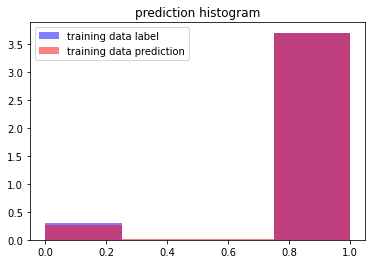

In [14]:
plt.title('prediction histogram')
plt.hist(train_label, bins=4, alpha=0.5, label='training data label', color='blue', density=True)
plt.hist(train_predict, bins=4, alpha=0.5, label='training data prediction', color='red', density=True)
plt.legend()
plt.show()

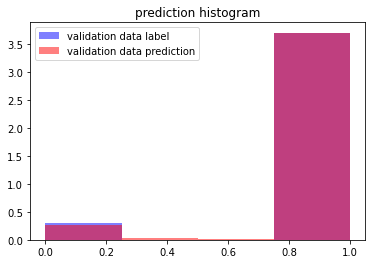

In [15]:
plt.title('prediction histogram')
plt.hist(validation_label, bins=4, alpha=0.5, label='validation data label', color='blue', density=True)
plt.hist(valid_predict, bins=4, alpha=0.5, label='validation data prediction', color='red', density=True)
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

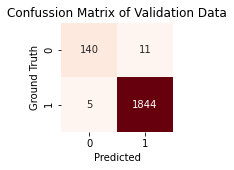

On the validation data,
percentage of class 0 being mistakenly predicted = 7.9%
percentage of class 1 being mistakenly predicted = 0.3%


In [50]:
val_cm = confusion_matrix(validation_label, (valid_predict>0.5).astype(int))

plt.figure(figsize=(2,2)) 
plt.title('Confussion Matrix of Validation Data')

sns.heatmap(val_cm, annot=True, fmt='d', cbar=False, cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')
plt.show()

v_0_r = val_cm[0,1]/val_cm[0,0] * 100
v_1_r = val_cm[1,0]/val_cm[1,1] * 100

print('On the validation data,')
print('percentage of class 0 being mistakenly predicted = {:.1f}%'.format(v_0_r))
print('percentage of class 1 being mistakenly predicted = {:.1f}%'.format(v_1_r))

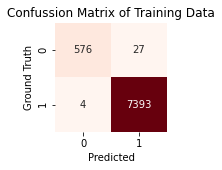

On the training data,
percentage of class 0 being mistakenly predicted = 4.7%
percentage of class 1 being mistakenly predicted = 0.1%


In [51]:
train_cm = confusion_matrix(train_label, (train_predict>0.5).astype(int))

plt.figure(figsize=(2,2)) 
plt.title('Confussion Matrix of Training Data')

sns.heatmap(train_cm, annot=True, fmt='d', cbar=False, cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')
plt.show()

t_0_r = train_cm[0,1]/train_cm[0,0] * 100
t_1_r = train_cm[1,0]/train_cm[1,1] * 100

print('On the training data,')
print('percentage of class 0 being mistakenly predicted = {:.1f}%'.format(t_0_r))
print('percentage of class 1 being mistakenly predicted = {:.1f}%'.format(t_1_r))

<b>Discussion</b>

The distribution of he prediction by the LSTM model mimics the distribution of the training data. The accuracy the prediction is also considerably good. However, since the number of data of the classes in not balanced, the prediction error for the class 0 is significantly larger. One can mitigate such dataset by reducing the number of the class 1 data or by synthesizing class 0 data.